![bse_logo_textminingcourse](https://bse.eu/sites/default/files/bse_logo_small.png)

# Text Mining - Final Project
### Julia Gonzalez, Joaquin Ossa, Daniela Velez

# Data Preprocessing and Modeling

In [110]:
!pip install textblob

DEPRECATION: Loading egg at c:\users\julia\appdata\local\programs\python\python311\lib\site-packages\tf_explain-0.3.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [127]:
#Import libraries
import pandas as pd
import ast
import pandas as pd
import statsmodels.api as sm
from stargazer.stargazer import Stargazer
import spacy
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import defaultdict
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
import re
from nltk.stem import PorterStemmer
from sklearn.preprocessing import StandardScaler, RobustScaler
RS=StandardScaler()
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

# 1. LOAD DATA FROM SCRAPING

In [63]:
# Load al csv files into dataframes
df_travelbag=pd.read_csv('travel_bag.csv')
df_dutchoven=pd.read_csv('dutch_oven.csv')
df_frame=pd.read_csv('frame.csv')
df_hangers=pd.read_csv('hangers.csv')
df_menjacket=pd.read_csv('men_jacket.csv')
df_men_tshirt=pd.read_csv('men_t-shirt.csv')
df_office_chair=pd.read_csv('office_chair.csv')
df_womenjacket=pd.read_csv('women_jacket.csv')
df_batteries=pd.read_csv('alkaline_batteries.csv')
df_dogbag=pd.read_csv('dog_bag_carrier.csv')
df_fryingpan=pd.read_csv('frying_pan.csv')
df_mattress=pd.read_csv('mattress.csv')
df_potsets=pd.read_csv('pot_sets.csv')
df_sportrousers=pd.read_csv('sport_trousers.csv')
df_womenshirt=pd.read_csv('women_t-shirt.csv')
df_towelset=pd.read_csv('towel_set.csv')
df_backpack=pd.read_csv('backpack.csv')
df_catfeed=pd.read_csv('cat_feed.csv')
df_dumbbells=pd.read_csv('dumbbells_set.csv')
df_mirror=pd.read_csv('mirror.csv')


In [64]:
# Add category column to each dataframe
df_travelbag['category']='travelbag'
df_dutchoven['category']='dutchoven'
df_frame['category']='frame'
df_hangers['category']='hangers'
df_menjacket['category']='menjacket'
df_men_tshirt['category']='men_t_shirt'
df_office_chair['category']='office_chair'
df_womenjacket['category']='womenjacket'
df_batteries['category']='batteries'
df_dogbag['category']='dogbag'
df_fryingpan['category']='fryingpan'
df_mattress['category']='mattress'
df_potsets['category']='potsets'
df_sportrousers['category']='sportrousers'
df_womenshirt['category']='womenshirt'
df_towelset['category']='towelset'
df_backpack['category']='backpack'
df_catfeed['category']='catfeed'
df_dumbbells['category']='dumbbells'
df_mirror['category']='mirror'     
        

In [65]:
# Group all dataframes into a list
data=[df_travelbag, df_dutchoven, df_frame, df_hangers, df_menjacket, 
      df_men_tshirt, df_office_chair, df_womenjacket, df_batteries, 
      df_dogbag, df_fryingpan,df_mattress, df_potsets, df_sportrousers,df_womenshirt,
      df_towelset, df_backpack, df_catfeed, df_dumbbells, df_mirror]

# 2. DATA CLEANING

In [66]:
# Check for total number of observations and mean number of observations per dataframe
total_len=len(df_travelbag)+len(df_dutchoven)+len(df_frame)+len(df_hangers)+len(df_menjacket)+len(df_men_tshirt)+len(df_office_chair)+len(df_womenjacket)+len(df_batteries)+len(df_dogbag)+len(df_fryingpan)+len(df_mattress)+len(df_potsets)+len(df_sportrousers)+len(df_womenshirt)+len(df_towelset)+len(df_backpack)+len(df_catfeed)+len(df_dumbbells)+len(df_mirror)   
mean_len=total_len/20
print("Total number of observations:", total_len)
print("Mean number of observations per df:",mean_len)

Total number of observations: 5950
Mean number of observations per df: 297.5


From the scraping, we are not able to obtain an indicator of Amazon Brand given that the column "manufacturer" always comes with no results. However, we can know whether a product is an Amazon Branded product if it has the name "Amazon" in the tile of the product or if it has "Amazon-Basics", "Amazon-Essentials", "Amazon-Aware" in the url. In these cases, an indicator of 1 in the newly created "Amazon Brand Indicator" column of each dataframe is added.

In [67]:
def Amazon_Indicator_title (df):
    df['Amazon Brand Indicator'] = (df['title'].str.contains(r'\bAmazon\b', case=False)).astype(int)
    number_amazon_brand_products=df['Amazon Brand Indicator'].value_counts()
    
    filtered_df = df.copy()
    filtered_df.loc[filtered_df['Amazon Brand Indicator'] == 0, 'Amazon Brand Indicator'] = (filtered_df.loc[filtered_df['Amazon Brand Indicator'] == 0, 'url'].str.contains(r'\bAmazon-Basics\b|\bAmazon-Essential\b|\bAmazon-Aware\b', case=False)).astype(int)
    print('df has:', number_amazon_brand_products)
    
    df=filtered_df
    return df

In [68]:
for df in data:
    df=Amazon_Indicator_title(df)
    

df has: Amazon Brand Indicator
0    302
Name: count, dtype: int64
df has: Amazon Brand Indicator
0    314
1      4
Name: count, dtype: int64
df has: Amazon Brand Indicator
0    303
Name: count, dtype: int64
df has: Amazon Brand Indicator
0    300
1      6
Name: count, dtype: int64
df has: Amazon Brand Indicator
0    305
1      1
Name: count, dtype: int64
df has: Amazon Brand Indicator
0    374
Name: count, dtype: int64
df has: Amazon Brand Indicator
0    285
1      3
Name: count, dtype: int64
df has: Amazon Brand Indicator
0    306
Name: count, dtype: int64
df has: Amazon Brand Indicator
0    273
1     15
Name: count, dtype: int64
df has: Amazon Brand Indicator
0    305
1      1
Name: count, dtype: int64
df has: Amazon Brand Indicator
0    303
1      3
Name: count, dtype: int64
df has: Amazon Brand Indicator
0    300
Name: count, dtype: int64
df has: Amazon Brand Indicator
0    315
1      3
Name: count, dtype: int64
df has: Amazon Brand Indicator
0    306
Name: count, dtype: int64
df h

Only those dataframes that have at least one Brand Amazon product will be kept for the analysis given that our main goal is to observe the association of those products and the ranking, compared to other non-Amazon products of the same category.

In [69]:
# Include df of searched only if it includes at least one product with Amazon Brand Indicator
new_data = [df for df in data if (df['Amazon Brand Indicator'] == 1).any()]

In [70]:
# Count the total observations in the new_data list
count_new_data_observations = sum(len(df) for df in new_data)
print("Total number of observations in new_data:", count_new_data_observations)

# Count the total number of dataframes in the new_data list
number_df=len(new_data)
print("Total number of searches in new_data:", number_df)

# Calculate the mean of 'Amazon Brand Indicator' column across all filtered dataframes
mean_appearances_brand_indicator = sum(df['Amazon Brand Indicator'].sum() for df in new_data) / len(new_data)
print("Mean appearances of Amazon Brand Indicator per dataframe in new_data:", mean_appearances_brand_indicator)

# Calculate the mean of 'Amazon Brand Indicator' column across all filtered dataframes
mean_appearances_brand_indicator_perc = sum(df['Amazon Brand Indicator'].mean() for df in new_data) / len(new_data)
print("Mean of Amazon Brand Indicators across all dataframes in new_data:", mean_appearances_brand_indicator_perc)

Total number of observations in new_data: 3753
Total number of searches in new_data: 13
Mean appearances of Amazon Brand Indicator per dataframe in new_data: 3.8461538461538463
Mean of Amazon Brand Indicators across all dataframes in new_data: 0.014089588141189081


# 3. DATA PREPROCESSING

### 3.1. DROP NOT SPECIFIC PRODUCT OBSERVATIONS

In [71]:
# Delete the three first rows with no actual products
new_data[5] = new_data[5].iloc[3:]
new_data[11] = new_data[11].iloc[3:]

### 3.2. IMPUTE MISSING VALUES FOR PRICE

In [72]:
# Impute missing values in 'price' column with mean price of corresponding page_nbr

def impute_missing_price(df):
    # Calculate mean price for each page_nbr
    mean_price_per_page = df.groupby('page_nbr')['price'].transform(lambda x: x.fillna(x.mean()))
    
    # Fill missing values in 'price' column with mean price of corresponding page_nbr
    df['price'] = mean_price_per_page
    
    return df

In [73]:
new_data_imputed = [impute_missing_price(df) for df in new_data]

### 3.3. CHECK CORRELATION BETWEEN SUBGROUP COLUMN AND OTHERS

In [74]:
#Print value counts of 'subgroup' column for each dataframe in data_imputed
for df in new_data:
    amazon=df['subgroup'].value_counts()
    print(amazon)

subgroup
organic            287
paid                30
amazons_choices      1
Name: count, dtype: int64
subgroup
organic            285
paid                18
amazons_choices      3
Name: count, dtype: int64
subgroup
organic            287
paid                18
amazons_choices      1
Name: count, dtype: int64
subgroup
organic            286
amazons_choices      2
Name: count, dtype: int64
subgroup
organic            287
amazons_choices      1
Name: count, dtype: int64
subgroup
organic            285
paid                15
amazons_choices      3
Name: count, dtype: int64
subgroup
organic            287
paid                18
amazons_choices      1
Name: count, dtype: int64
subgroup
organic            287
paid                30
amazons_choices      1
Name: count, dtype: int64
subgroup
organic            287
paid                18
amazons_choices      1
Name: count, dtype: int64
subgroup
organic            95
paid               18
amazons_choices     1
Name: count, dtype: int64
subgroup


In [75]:
# Check that "amazons_choice in subgroup column matches with is_amazons_choice column"
for df in new_data:
    amazons_choices_values = df.loc[df['subgroup'] == "amazons_choices", 'is_amazons_choice']
    print(amazons_choices_values)

62    True
Name: is_amazons_choice, dtype: bool
50     True
203    True
254    True
Name: is_amazons_choice, dtype: bool
50    True
Name: is_amazons_choice, dtype: bool
46    True
47    True
Name: is_amazons_choice, dtype: bool
47    True
Name: is_amazons_choice, dtype: bool
48    True
49    True
50    True
Name: is_amazons_choice, dtype: bool
50    True
Name: is_amazons_choice, dtype: bool
50    True
Name: is_amazons_choice, dtype: bool
50    True
Name: is_amazons_choice, dtype: bool
18    True
Name: is_amazons_choice, dtype: bool
46    True
47    True
Name: is_amazons_choice, dtype: bool
49    True
50    True
Name: is_amazons_choice, dtype: bool
46    True
47    True
Name: is_amazons_choice, dtype: bool


In [76]:
# Check that "paid" in subgroup column matches with is_sponsored column"
for df in new_data:
    amazons_choices_values = df.loc[df['subgroup'] == "paid", 'is_sponsored']
    print(amazons_choices_values)

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
63     True
64     True
65     True
114    True
115    True
116    True
165    True
166    True
167    True
216    True
217    True
218    True
267    True
268    True
269    True
Name: is_sponsored, dtype: bool
0      True
1      True
2      True
51     True
52     True
53     True
102    True
103    True
104    True
153    True
154    True
155    True
204    True
205    True
206    True
255    True
256    True
257    True
Name: is_sponsored, dtype: bool
0      True
1      True
2      True
51     True
52     True
53     True
102    True
103    True
104    True
153    True
154    True
155    True
204    True
205    True
206    True
255    True
256    True
257    True
Name: is_sponsored, dtype: bool
Series([], Name: is_sponsored, dtype: bool)
Series([], Name: is_sponsored, dtype: bool)
51     True
52     True


### 3.3. PREPROCESS DF

In [77]:
# Function to convert reviews columns into a list of dictionaries
def safe_literal_eval(x):
    try:
        return ast.literal_eval(x)
    except (SyntaxError, ValueError):
        return None

In [78]:
# Extract description text from the 'reviews' column
def extract_description_text(row):
    descriptions = []
    reviews = row['reviews']
    if reviews:  # Check if 'reviews' is not None
        for review_dict in reviews:
            curr_desc = review_dict.get('content', None)
            if curr_desc:
                descriptions.append(curr_desc)
    return ' '.join(descriptions)  # Join all descriptions into a single string

In [79]:
# Main Preprocessing Function
def preprocessing_df(df):
    
    # Drop unnecessary columns
    df=df.drop(columns=['manufacturer', 'asin', 'pos', 'Unnamed: 0', 'subgroup'])
    
    # Convert binary columns to numeric binary
    bool_to_int_mapping = {True: 1, False: 0}
    df['is_amazons_choice'] = df['is_amazons_choice'].map(bool_to_int_mapping)
    df['is_sponsored'] = df['is_sponsored'].map(bool_to_int_mapping)
    df['best_seller'] = df['best_seller'].map(bool_to_int_mapping)
    
    # Extract description content from reviews
    df['reviews'] = df['reviews'].apply(safe_literal_eval)
    df['description_reviews'] = df.apply(extract_description_text, axis=1)

    # Scaling price
    scaled_price = RS.fit_transform(df[['price']])
    df['price_scaled'] = scaled_price
    
    # Get Ranking
    df.reset_index(inplace=True)
    df.rename(columns={'index': 'Ranking'}, inplace=True)
    df['Ranking'] = df.index
    
    return df


In [80]:
# Apply function to each used DF
new_data_processed = [preprocessing_df(df) for df in new_data_imputed]

In [81]:
# Concatenate
combined_df = pd.concat(new_data_processed, ignore_index=True)

### 3.4. PREPROCESS DESCRIPTION OF REVIEWS

In [82]:
# Load the spaCy English language model
sp = spacy.load('en_core_web_sm')

# Define a function to strip non-word characters
def strip(word):
    mod_string = re.sub(r'\W+', '', word)
    return mod_string

# Define a function to handle abbreviations and convert to lowercase
def abbr_or_lower(word):
    if re.match('([A-Z]+[a-z]*){2,}', word):
        return word
    else:
        return word.lower()

# Define a function for lemmatization
def lemmatizing(text):
    sp_text = sp(text)
    stems = []
    lemmatized_text = []
    for word in sp_text:
        lemmatized_text.append(word.lemma_)
    stems = [abbr_or_lower(strip(w)) for w in lemmatized_text if abbr_or_lower(strip(w)) and abbr_or_lower(strip(w)) not in set(stopwords.words('english'))]
    return " ".join(stems)

In [83]:
# Apply lematization to reviews
description_reviews_lemmatized = [lemmatizing(text) for text in combined_df['description_reviews']]

In [112]:
# Add column with polarity to combined_df
combined_df['description_reviews_lemmatized']=description_reviews_lemmatized

In [85]:
#Define texts as the column with the lemmatized descriptions 
texts = combined_df['description_reviews_lemmatized']

# Initialize and fit_transform TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)  
tfidf_matrix = vectorizer.fit_transform(texts)

# Get feature names and document frequency
feature_names = vectorizer.get_feature_names_out()
df_scores = tfidf_matrix.toarray().sum(axis=0)

# Create a dictionary of words and their TF-IDF document frequency score
word_scores = dict(zip(feature_names, df_scores))

# Identify potential stopwords by setting a threshold
threshold = tfidf_matrix.shape[0] * 0.03  # Example threshold: words appearing in 3% of documents
potential_stopwords = [word for word, score in word_scores.items() if score > threshold]

print("Potential domain-specific stopwords:", potential_stopwords)

Potential domain-specific stopwords: ['battery', 'chair', 'easy', 'good', 'great', 'hanger', 'jacket', 'like', 'love', 'make', 'mirror', 'pan', 'towel', 'use', 'weight']


In [86]:
stopwords_manually=['battery', 'chair', 'hanger', 'jacket','make', 'mirror', 'pan', 'towel']

In [87]:
def remove_potential_stopwords(text, stopwords):
   
    return ' '.join(word for word in text.split() if word not in stopwords)

# Apply the function to remove potential stopwords from the lemmatized texts
combined_df['description_reviews_lemmatized'] = combined_df['description_reviews_lemmatized'].apply(lambda text: remove_potential_stopwords(text, stopwords_manually))

Apply TextBlob to obtain the polarity value

In [88]:
combined_df['polarity_lemmatized'] = combined_df['description_reviews_lemmatized'].apply(lambda x: TextBlob(x).sentiment.polarity)
combined_df['subjectivity_lemmatized'] = combined_df['description_reviews_lemmatized'].apply(lambda x: TextBlob(x).sentiment.subjectivity)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\julia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


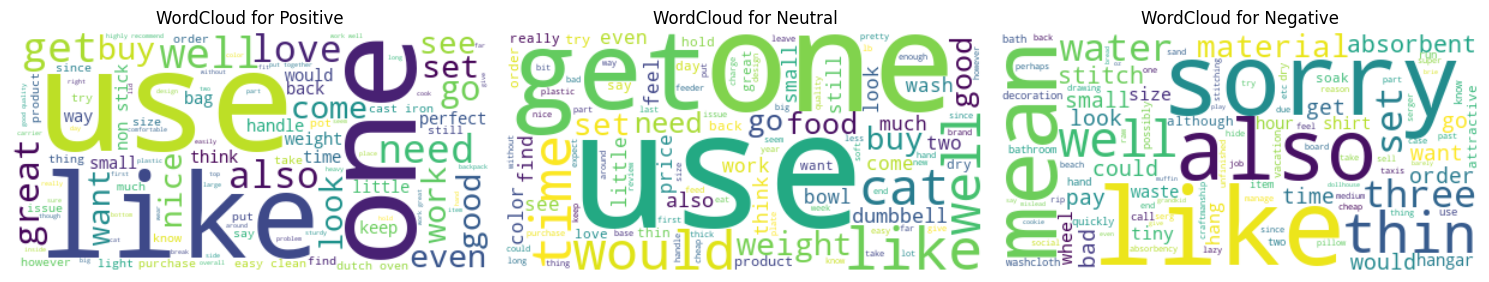

In [89]:

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Define sentiment labels based on polarity scores
def get_sentiment_label(polarity):
    if polarity < -0.1:
        return 0  # Negative
    elif polarity > 0.1:
        return 1  # Positive
    else:
        return 2  # Neutral

# Add a new column for sentiment labels
combined_df['sentiment_label_lemmatized'] = combined_df['polarity_lemmatized'].apply(get_sentiment_label)

labels = {0: 'Negative', 1: 'Positive', 2: 'Neutral'}

# Prepare data for wordclouds
label_data = defaultdict(lambda: '')

for _, row in combined_df.iterrows():
    label_data[row['sentiment_label_lemmatized']] += row['description_reviews_lemmatized'] + ' '

# Generate and plot wordclouds for each label
fig, axs = plt.subplots(1, len(labels), figsize=(15, 6))  # Adjust subplot size as needed
axs = axs.flatten()  # Flatten the axis array

for ax, (label, text) in zip(axs, label_data.items()):
    wordcloud = WordCloud(stopwords=stop_words, background_color='white', max_words=100).generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title('WordCloud for {}'.format(labels.get(label)))
    ax.axis('off')

plt.tight_layout()
plt.show() 

# 4. SUMMARY STATISTICS OF DATA

### 4.1. DISTRIBUTION OF AMAZN INDICATORS ACROSS PAGES

In [90]:
# Calculate the sum of 'Amazon Brand Indicator' appearances per page
amazon_brand_per_page = combined_df.groupby('page_nbr')['Amazon Brand Indicator'].sum()

# Calculate the sum of 'Best Seller' appearances per page
best_seller_per_page = combined_df.groupby('page_nbr')['best_seller'].sum()

# Calculate the sum of 'Is Sponsored' appearances per page
is_sponsored_per_page = combined_df.groupby('page_nbr')['is_sponsored'].sum()

# Calculate the total appearances of each indicator across all pages
total_amazon_brand = amazon_brand_per_page.sum()
total_best_seller = best_seller_per_page.sum()
total_is_sponsored = is_sponsored_per_page.sum()

# Calculate the percentage of appearances per page for each indicator
percentage_amazon_brand = (amazon_brand_per_page / total_amazon_brand) * 100
percentage_best_seller = (best_seller_per_page / total_best_seller) * 100
percentage_is_sponsored = (is_sponsored_per_page / total_is_sponsored) * 100

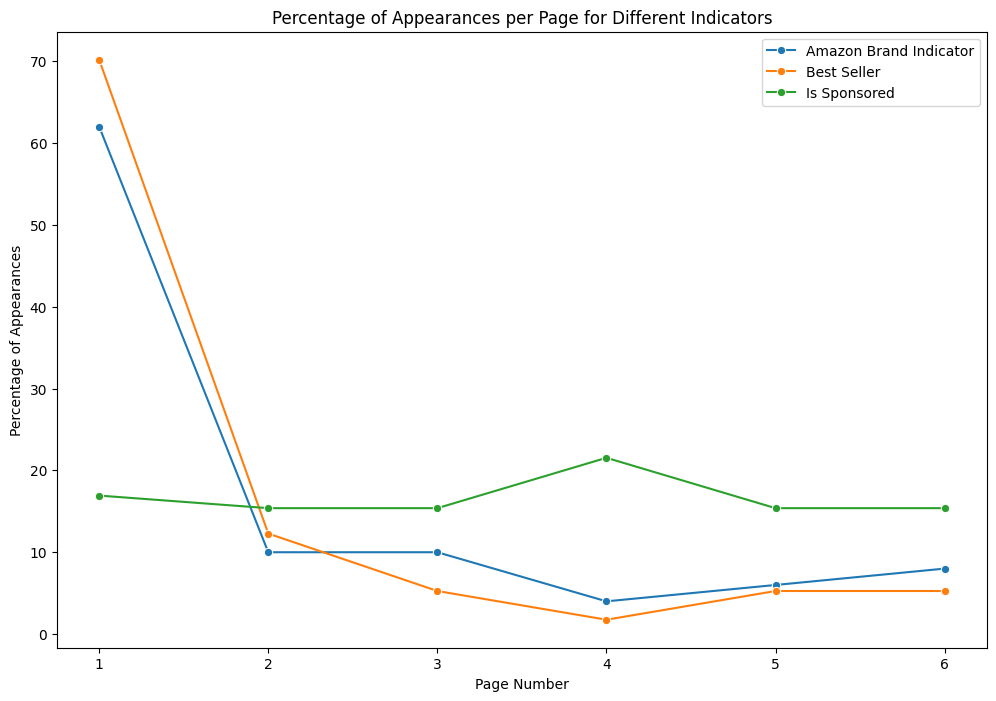

In [91]:

# Set up the figure and axis
plt.figure(figsize=(12, 8))

# Plot the percentages of appearances per page for 'Amazon Brand Indicator', 'Best Seller', 'Is Sponsored'
sns.lineplot(x=percentage_amazon_brand.index, y=percentage_amazon_brand.values, label='Amazon Brand Indicator', marker='o')
sns.lineplot(x=percentage_best_seller.index, y=percentage_best_seller.values, label='Best Seller', marker='o')
sns.lineplot(x=percentage_is_sponsored.index, y=percentage_is_sponsored.values, label='Is Sponsored', marker='o')

# Set labels and title
plt.xlabel('Page Number')
plt.ylabel('Percentage of Appearances')
plt.title('Percentage of Appearances per Page for Different Indicators')
plt.legend()

# Show plot
plt.show()


We can see that most of the appearances are on the first page for Amazon Brands and Best Sellers, while more uniform distribution of sponsored across pages.

In [92]:
# Calculate the sum of each indicator per page
total_amazon_brand = combined_df['Amazon Brand Indicator'].sum()
total_best_seller = combined_df['best_seller'].sum()
total_is_sponsored = combined_df['is_sponsored'].sum()


amazon_brand_per_page = combined_df.groupby(['page_nbr'])['Amazon Brand Indicator'].sum()
best_seller_per_page = combined_df.groupby(['page_nbr'])['best_seller'].sum()
is_sponsored_per_page = combined_df.groupby(['page_nbr'])['is_sponsored'].sum()

# Calculate the percentage of appearances per page for each indicator
percentage_amazon_brand = (amazon_brand_per_page / total_amazon_brand) * 100
percentage_best_seller = (best_seller_per_page / total_best_seller) * 100
percentage_is_sponsored = (is_sponsored_per_page / total_is_sponsored) * 100

# Display the percentage of appearances per page for each indicator
print("Percentage of Amazon Brand Indicator per Page:")
print(percentage_amazon_brand)

print("\nPercentage of Best Seller per Page:")
print(percentage_best_seller)

print("\nPercentage of Is Sponsored per Page:")
print(percentage_is_sponsored)

Percentage of Amazon Brand Indicator per Page:
page_nbr
1    62.0
2    10.0
3    10.0
4     4.0
5     6.0
6     8.0
Name: Amazon Brand Indicator, dtype: float64

Percentage of Best Seller per Page:
page_nbr
1    70.175439
2    12.280702
3     5.263158
4     1.754386
5     5.263158
6     5.263158
Name: best_seller, dtype: float64

Percentage of Is Sponsored per Page:
page_nbr
1    16.923077
2    15.384615
3    15.384615
4    21.538462
5    15.384615
6    15.384615
Name: is_sponsored, dtype: float64


### 4.2. DISTRIBUTION OF AMAZN INDICATORS ACROSS PAGES AND CATEGORIES

In [93]:
# Calculate the sum of 'Amazon Brand Indicator', 'Best Seller',  'Is Sponsored', appearances per category and page
amazon_brand_per_category_page = combined_df.groupby(['category', 'page_nbr'])['Amazon Brand Indicator'].sum()
best_seller_per_category_page = combined_df.groupby(['category', 'page_nbr'])['best_seller'].sum()
is_sponsored_per_category_page = combined_df.groupby(['category', 'page_nbr'])['is_sponsored'].sum()

# Calculate the total appearances of each indicator per category across all pages
total_amazon_brand_per_category = amazon_brand_per_category_page.groupby('category').sum()
total_best_seller_per_category = best_seller_per_category_page.groupby('category').sum()
total_is_sponsored_per_category = is_sponsored_per_category_page.groupby('category').sum()

# Calculate the percentage of appearances per category and page for each indicator
percentage_amazon_brand_per_category = (amazon_brand_per_category_page / total_amazon_brand_per_category) * 100
percentage_best_seller_per_category = (best_seller_per_category_page / total_best_seller_per_category) * 100
percentage_is_sponsored_per_category = (is_sponsored_per_category_page / total_is_sponsored_per_category) * 100



In [94]:

# Create index for categories and columns for pages
categories = combined_df['category'].unique()
pages = range(1, 7)  # Assuming 6 pages

# Initialize empty DataFrames for each indicator
is_sponsored_table = pd.DataFrame(index=categories, columns=pages)
best_seller_table = pd.DataFrame(index=categories, columns=pages)
amazon_brand_table = pd.DataFrame(index=categories, columns=pages)


# Fill in tables with percentage values
for category in categories:
    for page in pages:
        is_sponsored_table.loc[category, page] = percentage_is_sponsored_per_category.get((category, page), 0)
        best_seller_table.loc[category, page] = percentage_best_seller_per_category.get((category, page), 0)
        amazon_brand_table.loc[category, page] = percentage_amazon_brand_per_category.get((category, page), 0)
   
# Display tables with totals
print("Is Sponsored Table:")
print(is_sponsored_table)

print("\nBest Seller Table:")
print(best_seller_table)

print("\nAmazon Brand Product Table:")
print(amazon_brand_table)


Is Sponsored Table:
                      1          2          3          4          5          6
dutchoven          50.0       10.0       10.0       10.0       10.0       10.0
hangers       16.666667  16.666667  16.666667  16.666667  16.666667  16.666667
menjacket     16.666667  16.666667  16.666667  16.666667  16.666667  16.666667
office_chair        NaN        NaN        NaN        NaN        NaN        NaN
batteries           NaN        NaN        NaN        NaN        NaN        NaN
dogbag              0.0       20.0       20.0       20.0       20.0       20.0
fryingpan     16.666667  16.666667  16.666667  16.666667  16.666667  16.666667
potsets            10.0       10.0       10.0       50.0       10.0       10.0
towelset      16.666667  16.666667  16.666667  16.666667  16.666667  16.666667
backpack      16.666667  16.666667  16.666667  16.666667  16.666667  16.666667
catfeed             0.0       20.0       20.0       20.0       20.0       20.0
dumbbells           0.0       20

### 4.3. MEAN PRODUCT PRICE ACROSS PAGES

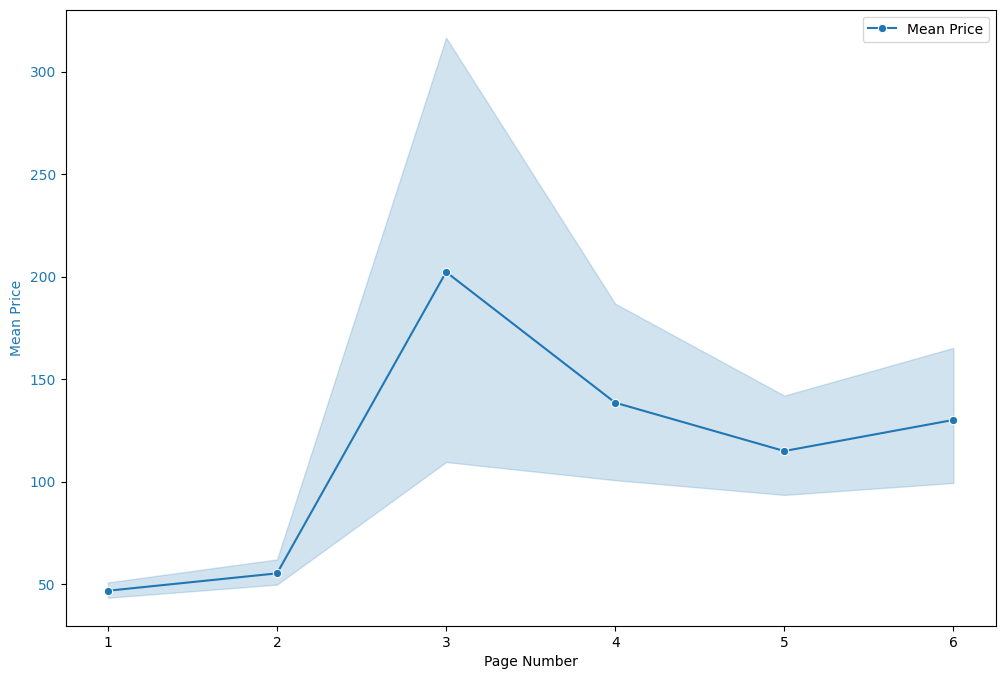

In [95]:
# Set up the figure and axis
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot the mean price per page
sns.lineplot(data=combined_df, x='page_nbr', y='price', marker='o', ax=ax1, label='Mean Price')

# Set labels and title for the primary y-axis
ax1.set_xlabel('Page Number')
ax1.set_ylabel('Mean Price', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Show plot
plt.show()

There is a high increase in the prices on thr products between the first 2 pages and those beyond. From the third one, prices seem to stagnate.

### 4.4. MEAN RATING AND POLARITY SCORES ACROSS PAGES FOR ALL PRODUCTS

In [122]:
amazon_products = combined_df[combined_df['Amazon Brand Indicator'] == 1]
non_amazon_products = combined_df[combined_df['Amazon Brand Indicator'] == 0]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


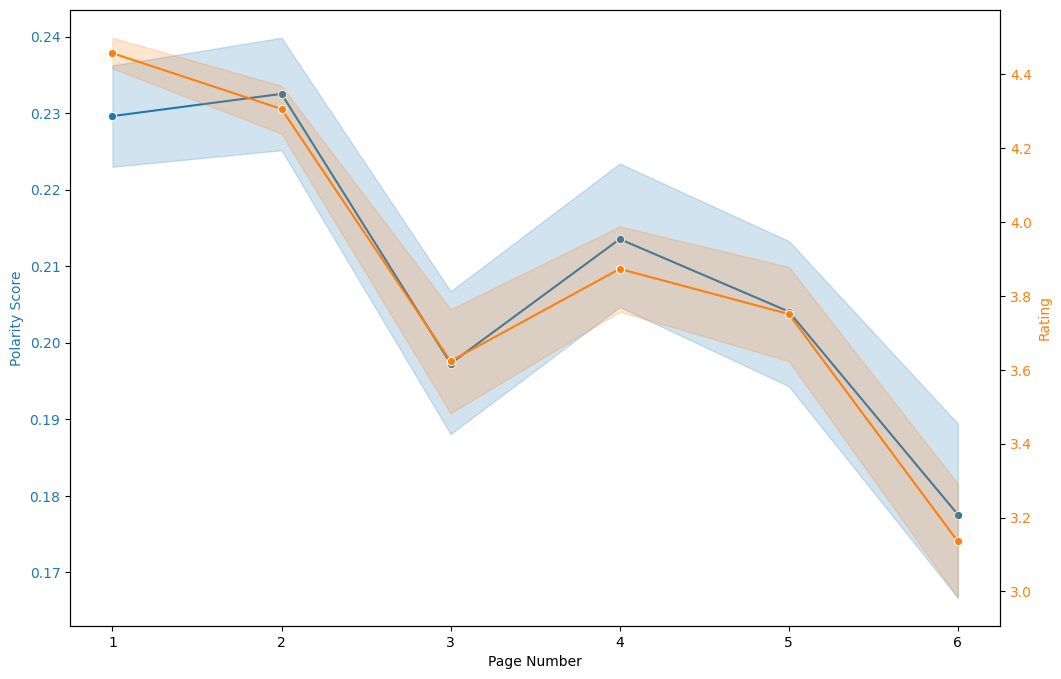

In [121]:

# Set up the figure and axis
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot the mean price per page
sns.lineplot(data=combined_df, x='page_nbr', y='polarity_lemmatized', marker='o', ax=ax1, color='tab:blue')

# Set labels for the primary y-axis
ax1.set_xlabel('Page Number')
ax1.set_ylabel('Polarity Score', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot the mean rating per page on the secondary y-axis
sns.lineplot(data=combined_df, x='page_nbr', y='rating', marker='o', ax=ax2, color='tab:orange')

# Set labels for the secondary y-axis
ax2.set_ylabel('Rating', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Remove legends
ax1.legend().remove()
ax2.legend().remove()

# Show plot
plt.show()


We can notice a similar trends between polarity score and rating across pages, except in the first two where they seem to have contrary trends.

### 4.5. MEAN RATING AND POLARITY SCORES ACROSS PAGES AMAZON PRODUCTS vs NON-AMAZON PRODUCTS

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


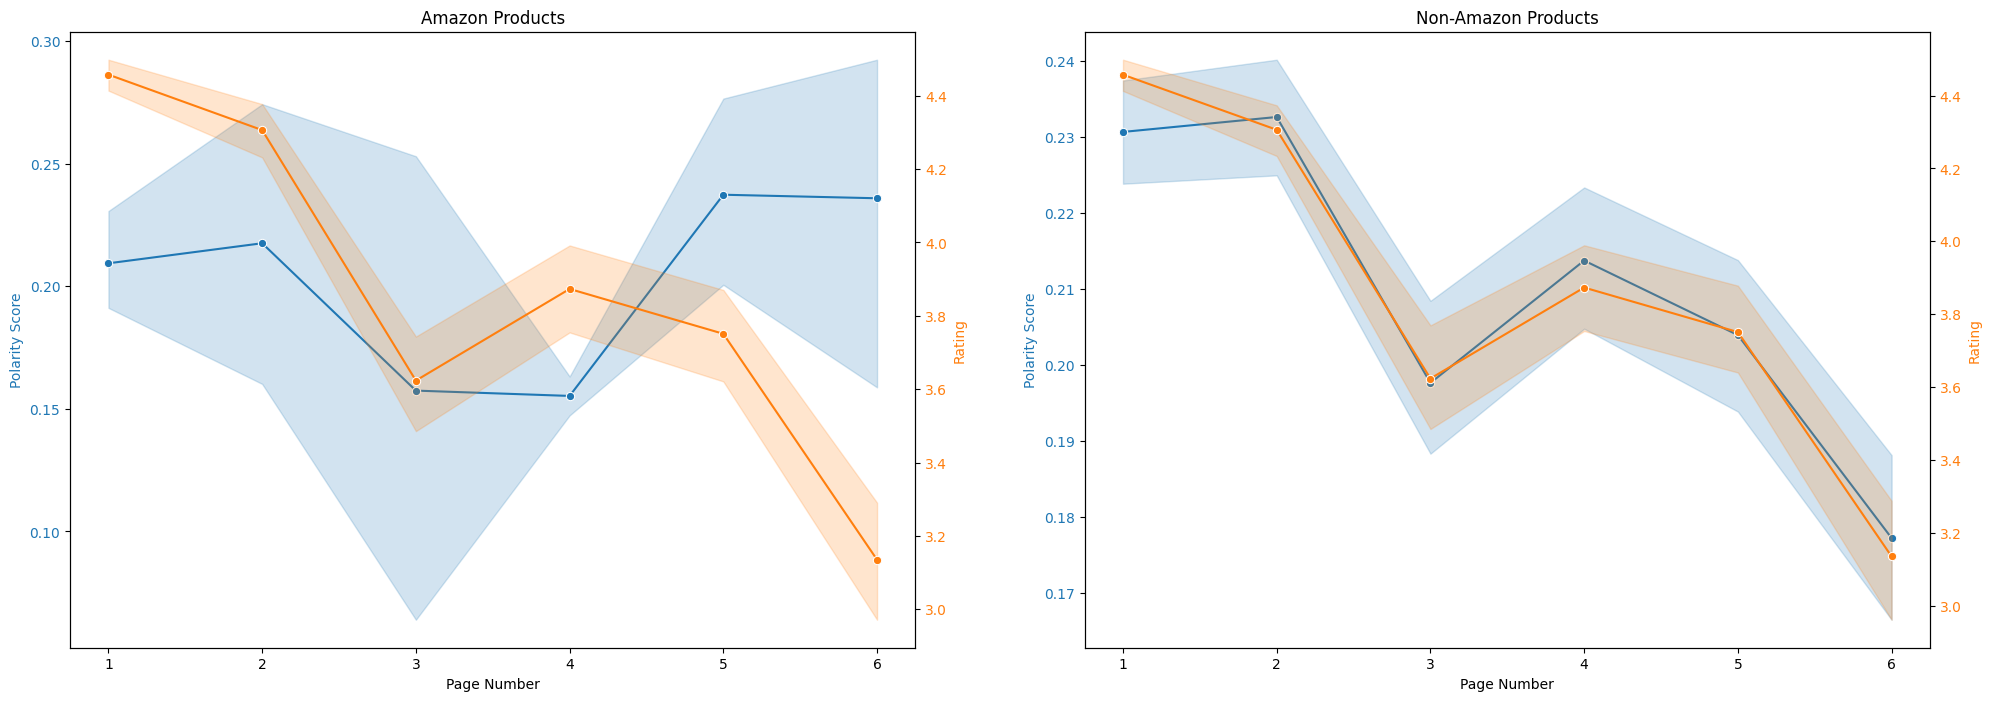

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure with 1 row and 2 columns for subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 8))  # Adjusted figsize to accommodate both plots side by side

# First subplot for amazon_products
sns.lineplot(data=amazon_products, x='page_nbr', y='polarity_lemmatized', marker='o', ax=ax1, color='tab:blue')
ax1.set_xlabel('Page Number')
ax1.set_ylabel('Polarity Score', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1_twin = ax1.twinx()
sns.lineplot(data=combined_df, x='page_nbr', y='rating', marker='o', ax=ax1_twin, color='tab:orange')
ax1_twin.set_ylabel('Rating', color='tab:orange')
ax1_twin.tick_params(axis='y', labelcolor='tab:orange')
ax1.set_title('Amazon Products')

# Second subplot for non_amazon_products
sns.lineplot(data=non_amazon_products, x='page_nbr', y='polarity_lemmatized', marker='o', ax=ax2, color='tab:blue')
ax2.set_xlabel('Page Number')
ax2.set_ylabel('Polarity Score', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2_twin = ax2.twinx()
sns.lineplot(data=combined_df, x='page_nbr', y='rating', marker='o', ax=ax2_twin, color='tab:orange')
ax2_twin.set_ylabel('Rating', color='tab:orange')
ax2_twin.tick_params(axis='y', labelcolor='tab:orange')
ax2.set_title('Non-Amazon Products')

# Remove legends if they are not needed
ax1.legend().remove()
ax1_twin.legend().remove()
ax2.legend().remove()
ax2_twin.legend().remove()

# Show plot
plt.show()

We observe a bit differend relationship between ratings and polarity scores regarding Amazon products and non-Amazon products.

Difference in mean price between first two pages and pages 3 to 6

In [97]:
# Calculate the average price for pages 1 and 2
average_price_pages_1_2 = combined_df[combined_df['page_nbr'].isin([1, 2])]['price'].mean()

# Calculate the average price for pages 3, 4, 5, and 6
average_price_pages_3_to_6 = combined_df[combined_df['page_nbr'].isin([3, 4, 5, 6])]['price'].mean()

# Compute the percentage difference between the two averages
price_difference_percentage = ((average_price_pages_1_2 - average_price_pages_3_to_6) / average_price_pages_3_to_6) * 100

print("Difference in average price between pages 1-2 and pages 3-6 (as a percentage):", price_difference_percentage)



Difference in average price between pages 1-2 and pages 3-6 (as a percentage): -65.2041301658482


In [98]:
amazon_products = combined_df[combined_df['Amazon Brand Indicator'] == 1]
non_amazon_products = combined_df[combined_df['Amazon Brand Indicator'] == 0]

In [99]:
mean_sponsored_amazon = amazon_products['is_sponsored'].mean()
mean_sponsored_non_amazon = non_amazon_products['is_sponsored'].mean()

### 4.6. MEAN CHARACTERISTICS BETWEEN AMAZON PRODUCTS AND NON-AMAZON PRODUCTS

In [100]:
def calculate_mean_features(combined_df):
    # Separate the data into two groups: Amazon products and non-Amazon products
    amazon_products = combined_df[combined_df['Amazon Brand Indicator'] == 1]
    non_amazon_products = combined_df[combined_df['Amazon Brand Indicator'] == 0]

    # Filter products with at least one review
    reviewed_products_amazon = amazon_products[amazon_products['reviews_count'] > 0]
    reviewed_products_non_amazon = non_amazon_products[non_amazon_products['reviews_count'] > 0]

    # Calculate the mean values for Amazon and non-Amazon products
    mean_reviews_count_amazon = reviewed_products_amazon['reviews_count'].mean()
    mean_reviews_count_non_amazon = reviewed_products_non_amazon['reviews_count'].mean()
    
    mean_rating_amazon = amazon_products['rating'].mean()
    mean_rating_non_amazon = non_amazon_products['rating'].mean()

    mean_best_seller_amazon = amazon_products['best_seller'].mean()
    mean_best_seller_non_amazon = non_amazon_products['best_seller'].mean()

    mean_price_amazon = amazon_products['price'].mean()
    mean_price_non_amazon = non_amazon_products['price'].mean()

    mean_sponsored_amazon = amazon_products['is_sponsored'].mean()
    mean_sponsored_non_amazon = non_amazon_products['is_sponsored'].mean()
    
    mean_ranking_amazon = amazon_products['Ranking'].mean()
    mean_ranking_non_amazon = non_amazon_products['Ranking'].mean()

    # Create a DataFrame with the mean values
    mean_values_df = pd.DataFrame({
        'Feature': ['Reviews Count (All Products)', 'Reviews Count (Products with at least 1 Review)', 'Rating', 'Best Seller', 'Price', 'Sponsored', 'Ranking'],
        'Amazon Products': [mean_reviews_count_amazon, mean_reviews_count_amazon, mean_rating_amazon, mean_best_seller_amazon, mean_price_amazon, mean_sponsored_amazon, mean_ranking_amazon],
        'Non-Amazon Products': [mean_reviews_count_non_amazon, mean_reviews_count_non_amazon, mean_rating_non_amazon, mean_best_seller_non_amazon, mean_price_non_amazon, mean_sponsored_non_amazon, mean_ranking_non_amazon]
    })

    return mean_values_df
# Call the function with your combined_df DataFrame
mean_features_df = calculate_mean_features(combined_df)

print(mean_features_df)


                                           Feature  Amazon Products  \
0                     Reviews Count (All Products)       51938.3200   
1  Reviews Count (Products with at least 1 Review)       51938.3200   
2                                           Rating           4.4840   
3                                      Best Seller           0.1000   
4                                            Price          39.1614   
5                                        Sponsored           0.0400   
6                                          Ranking          70.7400   

   Non-Amazon Products  
0          2981.357565  
1          2981.357565  
2             3.849770  
3             0.014065  
4           115.623560  
5             0.052204  
6           149.205572  


### 4.7. CORRELATION BETWEEN VARIABLES

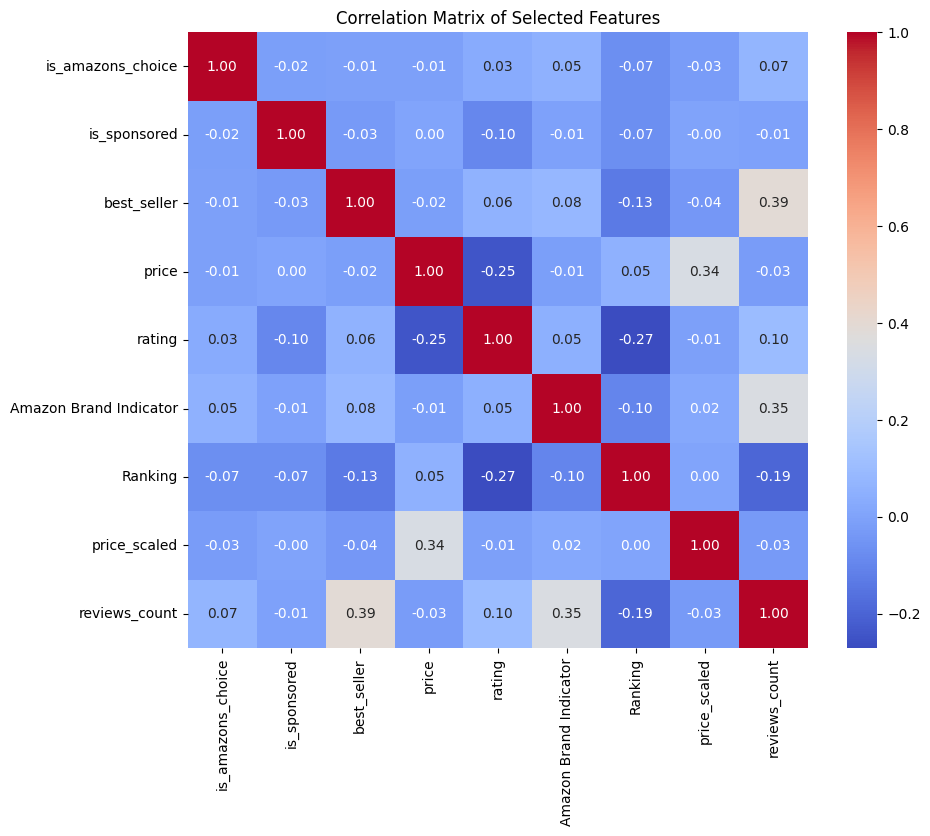

In [101]:
selected_features = ['is_amazons_choice', 'is_sponsored', 'best_seller', 'price', 
       'rating',  'Amazon Brand Indicator', 'Ranking', 'price_scaled', 'reviews_count']

# Create a subset DataFrame with selected features
subset_df = combined_df[selected_features]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix of Selected Features')
plt.show()

In [102]:
combined_df.head()

,Ranking,is_amazons_choice,is_sponsored,best_seller,price,rating,reviews_count,title,url,page_nbr,reviews,category,Amazon Brand Indicator,description_reviews,price_scaled,description_reviews_lemmatized,polarity_lemmatized,subjectivity_lemmatized,sentiment_label_lemmatized
0,0,0,1,0,75.108833,4.9,15,La Cuisine 6210GK Enameled Cast Iron Oval Dutc...,https://aax-us-iad.amazon.com/x/c/RLcSK8lUTaz6...,1,"[{'title': '5.0 out of 5 stars Cooking', 'auth...",dutchoven,0,1st item we did was chicken & dumplings. Turne...,0.360182,1st item chicken dumpling turn marvelous cocot...,0.200000,0.975000,1
1,1,0,1,0,75.108833,4.6,509,La Cuisine Enameled Cast Iron Dutch Oven Casse...,https://aax-us-iad.amazon.com/x/c/RLcSK8lUTaz6...,1,"[{'title': '5.0 out of 5 stars I love it', 'au...",dutchoven,0,"I have a 5 qt , I bought a 3.7 , this thing is...",0.360182,5 qt buy 37 thing small wonderful well great s...,0.305183,0.599156,1
2,2,0,1,0,75.108833,4.6,509,La Cuisine Enameled Cast Iron Dutch Oven Casse...,https://aax-us-iad.amazon.com/x/c/RLcSK8lUTaz6...,1,"[{'title': '5.0 out of 5 stars I love it', 'au...",dutchoven,0,"I have a 5 qt , I bought a 3.7 , this thing is...",0.360182,5 qt buy 37 thing small wonderful well great s...,0.305183,0.599156,1
3,3,0,1,0,56.990000,4.7,45800,Amazon Basics Enameled Cast Iron Covered Round...,/sspa/click?ie=UTF8&spc=MTo5NTQ5MTcyNzkyMTQwNj...,1,[{'title': '5.0 out of 5 stars Works GREAT! Tr...,dutchoven,1,I wish I would have bought this earlier. I hav...,-0.006486,wish would buy early 35l staub dutch oven smal...,0.179711,0.528456,1
4,4,0,1,0,69.990000,4.6,1425,"vancasso Cast Iron Dutch Oven, 6 qt Dutch Oven...",/sspa/click?ie=UTF8&spc=MTo5NTQ5MTcyNzkyMTQwNj...,1,[{'title': '5.0 out of 5 stars Excellent produ...,dutchoven,0,I cannot say enough about this enamel coated c...,0.256593,say enough enamel coat cast iron dutch oven lo...,0.228992,0.557143,1


## Model 1
### Using all data and "Rating"

In [103]:
# Extract dependent variable (y) and independent variables (X)
y = combined_df[['Ranking']]  # Dependent variable
X = combined_df[['is_amazons_choice', 'is_sponsored', 'best_seller', 'price_scaled',
        'Amazon Brand Indicator','rating']]
X = sm.add_constant(X)  # Adding a constant term to the independent variables

    # Fit the Ordinary Least Squares (OLS) model
# Fit the Ordinary Least Squares (OLS) model with clustered standard errors
model_clustered_polarity = sm.OLS(y, X).fit(cov_type='cluster', cov_kwds={'groups': combined_df['category']})

    # Print the summary of the regression results
print(model_clustered_polarity.summary())

                            OLS Regression Results                            
Dep. Variable:                Ranking   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     30.05
Date:                Sun, 17 Mar 2024   Prob (F-statistic):           1.48e-06
Time:                        11:51:54   Log-Likelihood:                -21881.
No. Observations:                3747   AIC:                         4.378e+04
Df Residuals:                    3740   BIC:                         4.382e+04
Df Model:                           6                                         
Covariance Type:              cluster                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    211

## Model 2
### Using all data with "Polarity scores"

In [104]:
# Extract dependent variable (y) and independent variables (X)
y = combined_df[['Ranking']]  # Dependent variable
X = combined_df[['is_amazons_choice', 'is_sponsored', 'best_seller', 'price_scaled',
        'Amazon Brand Indicator','polarity_lemmatized']]
X = sm.add_constant(X)  # Adding a constant term to the independent variables

    # Fit the Ordinary Least Squares (OLS) model
# Fit the Ordinary Least Squares (OLS) model with clustered standard errors
model_clustered_polarity = sm.OLS(y, X).fit(cov_type='cluster', cov_kwds={'groups': combined_df['category']})

    # Print the summary of the regression results
print(model_clustered_polarity.summary())

                            OLS Regression Results                            
Dep. Variable:                Ranking   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     21.94
Date:                Sun, 17 Mar 2024   Prob (F-statistic):           8.21e-06
Time:                        11:51:54   Log-Likelihood:                -21983.
No. Observations:                3747   AIC:                         4.398e+04
Df Residuals:                    3740   BIC:                         4.402e+04
Df Model:                           6                                         
Covariance Type:              cluster                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    174

## Model 3
### Using data from pages 1-2 with "Rating"

In [105]:
combined_df_pg12=combined_df[combined_df['page_nbr']<3]

In [106]:
number_of_products=len(combined_df_pg12)/13
print(number_of_products)

95.92307692307692


In [107]:

# Extract dependent variable (y) and independent variables (X)
y = combined_df_pg12[['Ranking']]  # Dependent variable
X = combined_df_pg12[['is_amazons_choice', 'is_sponsored', 'best_seller', 'price_scaled', 'rating', 'Amazon Brand Indicator']]
X = sm.add_constant(X)  # Adding a constant term to the independent variables

cluster=combined_df['category']
# Fit the Ordinary Least Squares (OLS) model with clustered standard errors
model_clustered_12 = sm.OLS(y, X).fit(cov_type='cluster', cov_kwds={'groups': combined_df_pg12['category']})

# Print the summary of the regression results
print(model_clustered_12.summary())

                            OLS Regression Results                            
Dep. Variable:                Ranking   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     27.98
Date:                Sun, 17 Mar 2024   Prob (F-statistic):           2.19e-06
Time:                        11:51:54   Log-Likelihood:                -5924.5
No. Observations:                1247   AIC:                         1.186e+04
Df Residuals:                    1240   BIC:                         1.190e+04
Df Model:                           6                                         
Covariance Type:              cluster                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     69

## Model 4
### Using data from pages 1-2 with "Polarity score"

In [108]:

# Extract dependent variable (y) and independent variables (X)
y = combined_df_pg12[['Ranking']]  # Dependent variable
X = combined_df_pg12[['is_amazons_choice', 'is_sponsored', 'best_seller', 'price_scaled', 'polarity_lemmatized', 'Amazon Brand Indicator']]
X = sm.add_constant(X)  # Adding a constant term to the independent variables

cluster=combined_df_pg12['category']
# Fit the Ordinary Least Squares (OLS) model with clustered standard errors
model_clustered_12_polarity = sm.OLS(y, X).fit(cov_type='cluster', cov_kwds={'groups': combined_df_pg12['category']})

# Print the summary of the regression results
print(model_clustered_12_polarity.summary())

                            OLS Regression Results                            
Dep. Variable:                Ranking   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     34.10
Date:                Sun, 17 Mar 2024   Prob (F-statistic):           7.35e-07
Time:                        11:51:54   Log-Likelihood:                -5929.8
No. Observations:                1247   AIC:                         1.187e+04
Df Residuals:                    1240   BIC:                         1.191e+04
Df Model:                           6                                         
Covariance Type:              cluster                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     49

## ANNEX - SCATTER POLARITY AND RATING ACROSS CATEGORIES

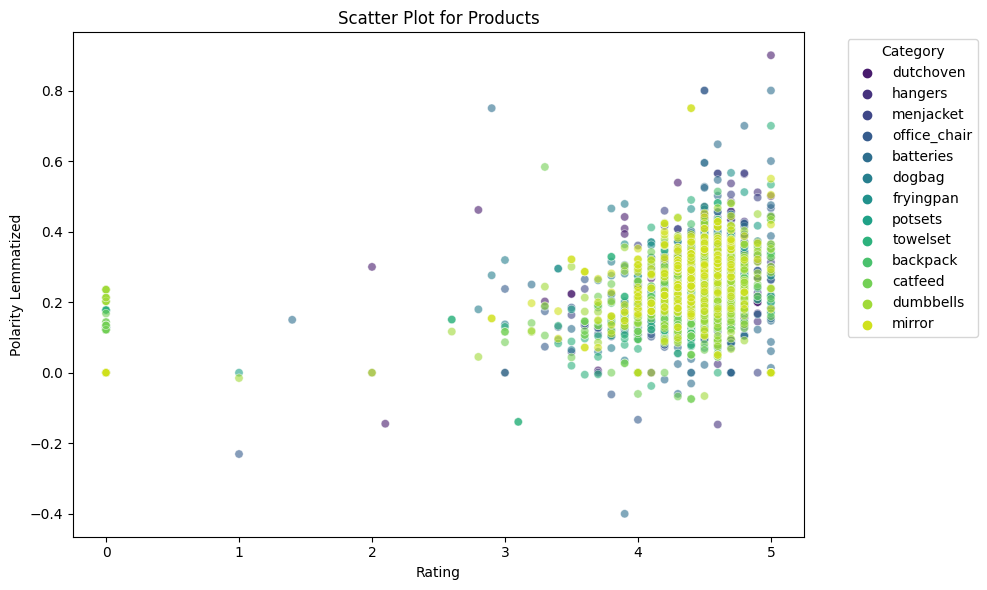

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define category groups
category_groups = {
    'Products': ['dutchoven', 'fryingpan', 'potsets', 'hangers', 'mirror', 'towelset', 'menjacket', 'dumbbells', 'backpack', 'dogbag', 'catfeed', 'office_chair', 'batteries'],
}

# Filter the DataFrame for all categories within the 'Products' group
filtered_df = combined_df[combined_df['category'].isin(category_groups['Products'])]

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='rating', y='polarity_lemmatized', hue='category', palette='viridis', alpha=0.6)

# Add title and labels
plt.title('Scatter Plot for Products')
plt.xlabel('Rating')
plt.ylabel('Polarity Lemmatized')

# Show plot
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


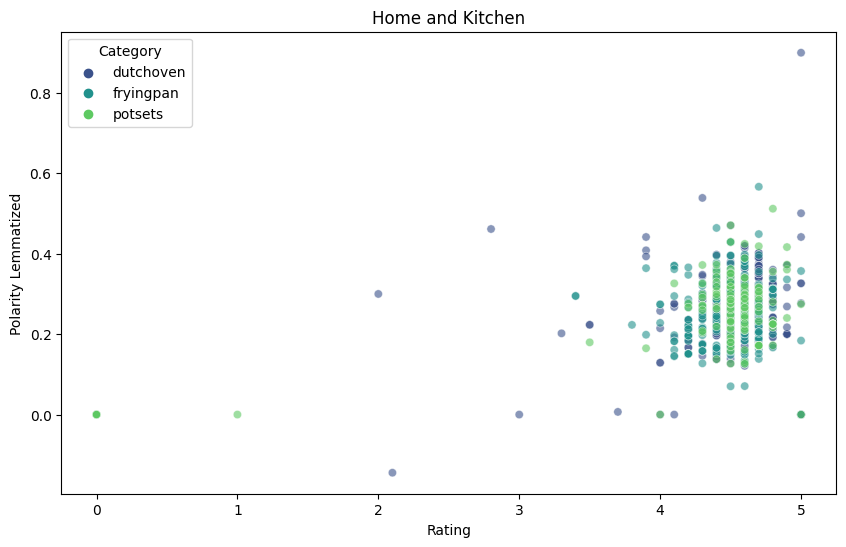

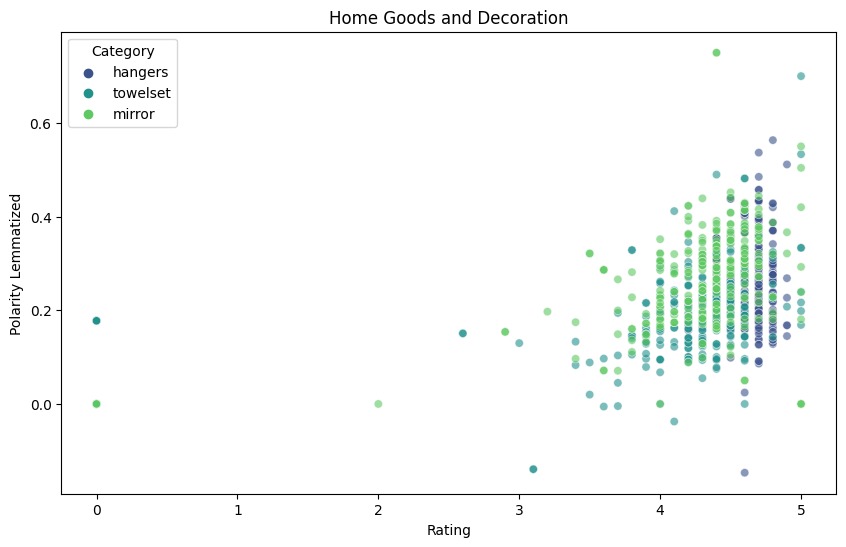

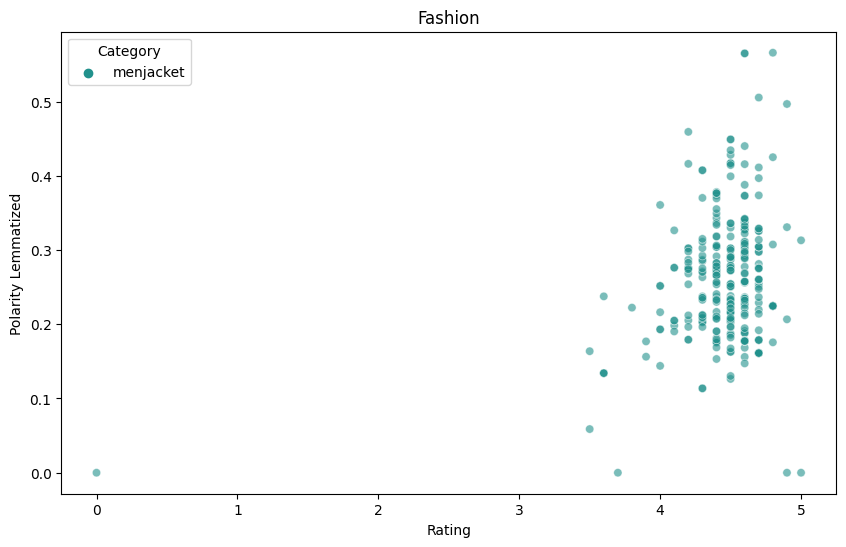

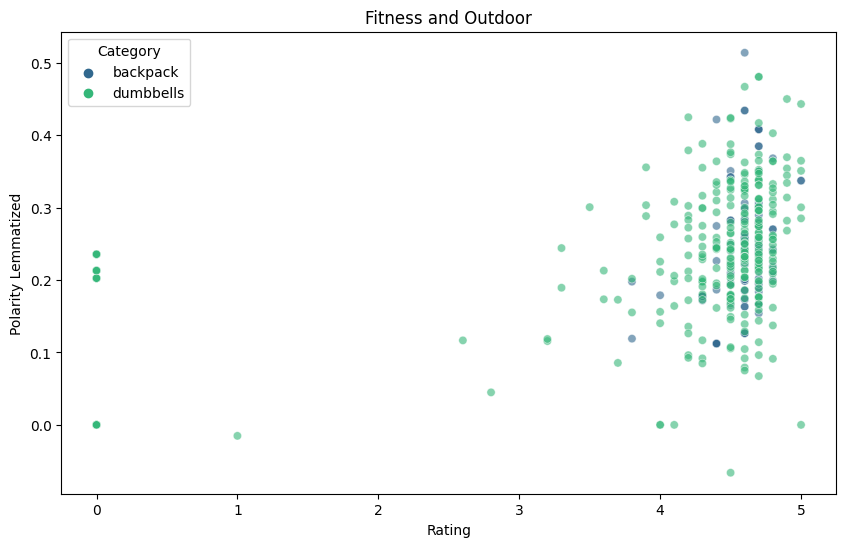

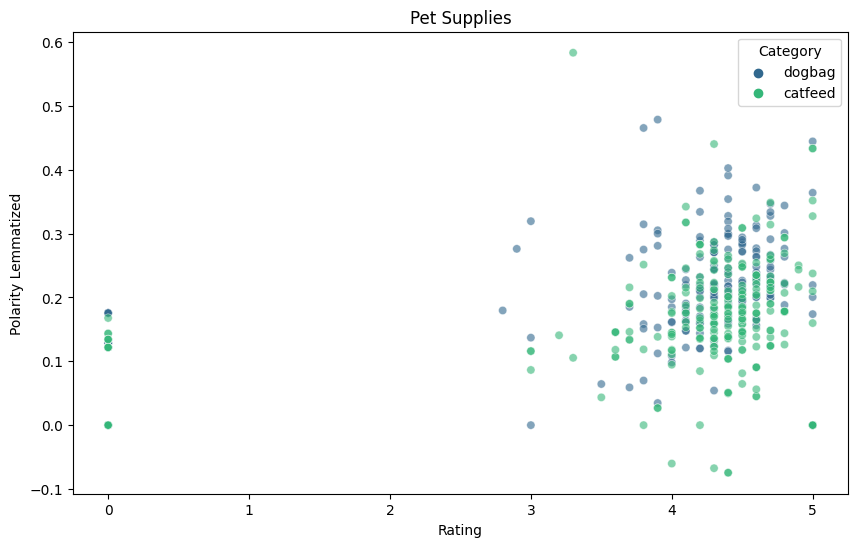

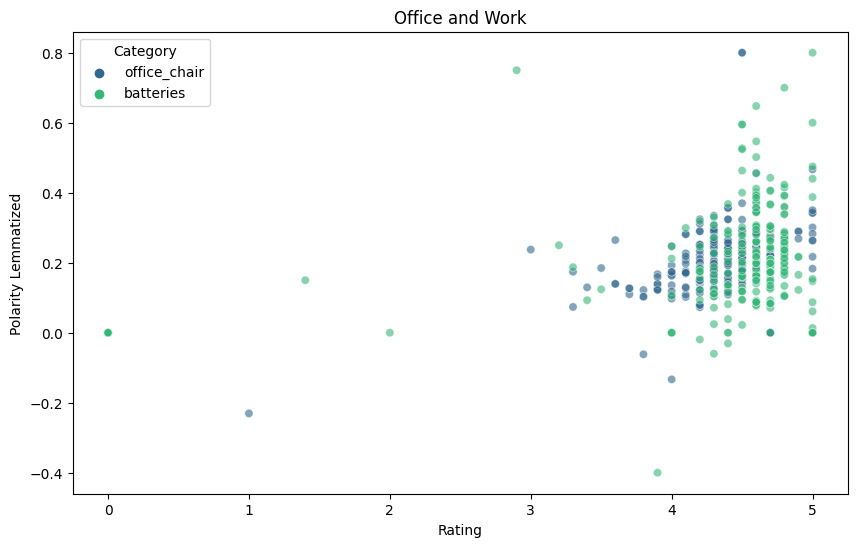

In [111]:

# Define category groups
category_groups = {
    'Home and Kitchen': ['dutchoven', 'fryingpan', 'potsets'],
    'Home Goods and Decoration': ['hangers', 'mirror', 'towelset'],
    'Fashion': ['menjacket'],
    'Fitness and Outdoor': ['dumbbells', 'backpack'],
    'Pet Supplies': ['dogbag', 'catfeed'],
    'Office and Work': ['office_chair', 'batteries']
}

# Loop through each category group to create scatter plots
for title, categories in category_groups.items():
    # Filter the DataFrame for the current group of categories
    filtered_df = combined_df[combined_df['category'].isin(categories)]
    
    # Create the scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=filtered_df, x='rating', y='polarity_lemmatized', hue='category', palette='viridis', alpha=0.6)
    
    # Add title and labels
    plt.title(title)
    plt.xlabel('Rating')
    plt.ylabel('Polarity Lemmatized')
    plt.legend(title='Category')
    
    # Show plot
    plt.show()